## Part 2 - simulation experiments

The correctness of the implementation is checked below in the following way:
* generate synthetic datasets
* check if there is a possibility to get probabilities and predictions from the model
* check metrics (Accuracy, Precision, Recall, F1-score) at the end of training for two synthetic datasets
* check Accuracy and tolerance behavior during the training
* check the performance on various datasets

In [1]:
from Implementation import LogisticRegression_with_IRLS
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={'figure.figsize':(11,9)})
import matplotlib.pyplot as plt
from utils import run_experiments, make_boxplot, generate_dataset1, generate_dataset2, generate_dataset3, generate_dataset4, generate_xor, check_performance

### Generate synthetic datasets

#### Synthetic dataset 1

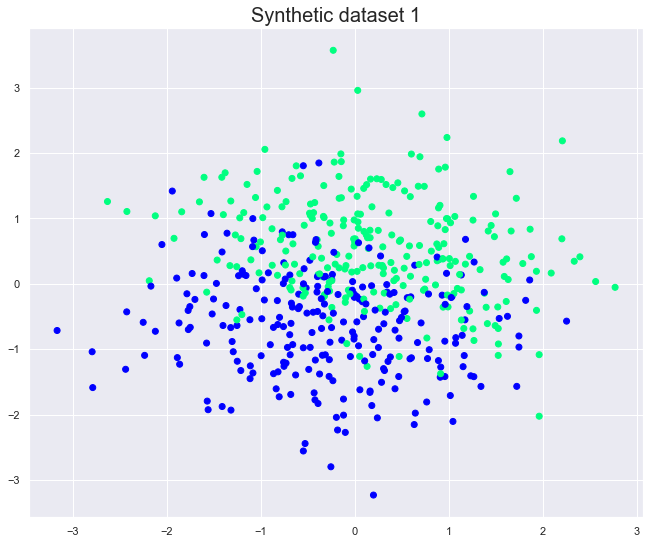

In [2]:
first_dataset_X, first_dataset_y = generate_dataset1(500)
plt.scatter(first_dataset_X[:,0], first_dataset_X[:,1], c=first_dataset_y, cmap='winter')
plt.title('Synthetic dataset 1', fontsize=20)
plt.show()

#### Synthetic dataset 2

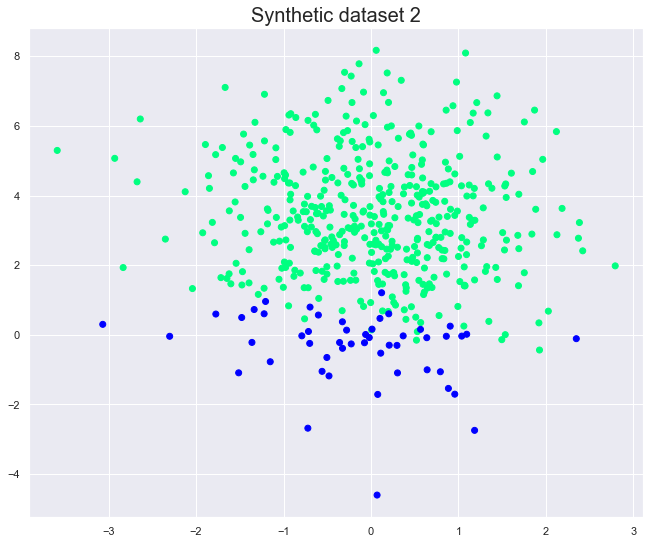

In [3]:
second_dataset_X, second_dataset_y = generate_dataset2(500)
plt.scatter(second_dataset_X[:,0], second_dataset_X[:,1], c=second_dataset_y, cmap='winter')
plt.title('Synthetic dataset 2', fontsize=20)
plt.show()

#### Synthetic dataset 3

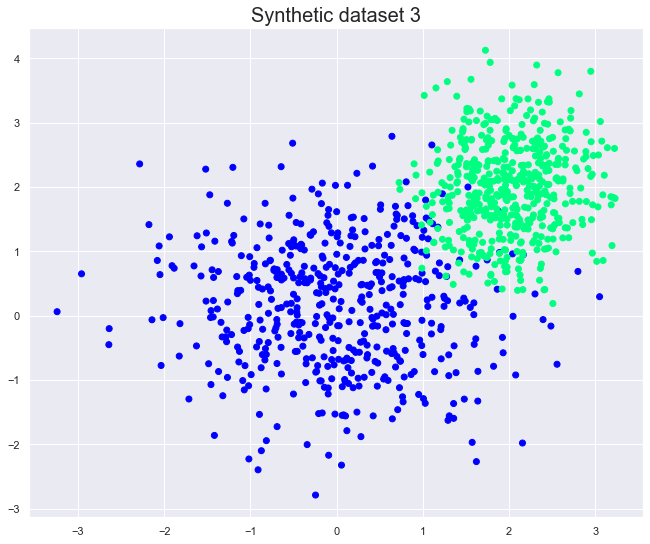

In [4]:
third_dataset = generate_dataset3(2)
third_dataset_X = third_dataset[:,0:2]
third_dataset_y = third_dataset[:,2]
plt.scatter(third_dataset_X[:,0], third_dataset_X[:,1], c=third_dataset_y, cmap='winter')
plt.title('Synthetic dataset 3', fontsize=20)
plt.show()

#### Synthetic dataset 4

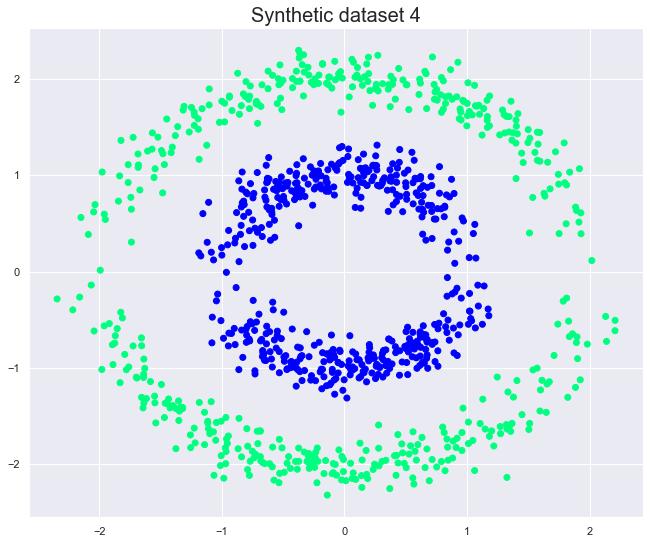

In [5]:
fourth_dataset = generate_dataset4(0.14)
fourth_dataset_X = fourth_dataset[:,0:2]
fourth_dataset_y = fourth_dataset[:,2]
plt.scatter(fourth_dataset_X[:,0], fourth_dataset_X[:,1], c=fourth_dataset_y, cmap='winter')
plt.title('Synthetic dataset 4', fontsize=20)
plt.show()

#### XOR dataset

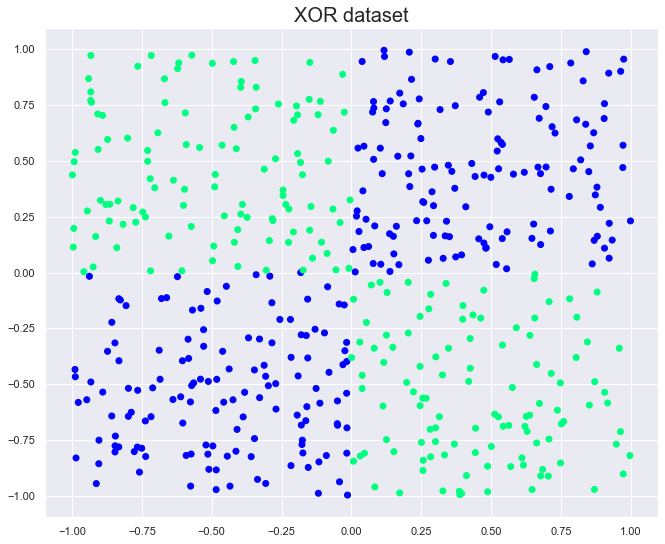

In [6]:
xor_X, xor_y = generate_xor(500)
plt.scatter(xor_X[:,0], xor_X[:,1], c=xor_y, cmap='winter')
plt.title('XOR dataset', fontsize=20)
plt.show()

#### Test 1

Check if there is a possibility to get probabilities and predictions from the model.

In [7]:
first_dataset_X_train, first_dataset_X_test, first_dataset_y_train, first_dataset_y_test = train_test_split(first_dataset_X, first_dataset_y, test_size=0.2, random_state=42)
first_clf = LogisticRegression_with_IRLS()
first_clf.fit(first_dataset_X_train, first_dataset_y_train, max_iter=500)
first_dataset_proba = first_clf.predict_proba(first_dataset_X_test)
first_dataset_y_pred = first_clf.predict(first_dataset_X_test)

In [8]:
print(f'Length of test dataset: {len(first_dataset_X_test)}, length of predicted probabilities: {len(first_dataset_proba)}, length of predicted classes: {len(first_dataset_y_pred)}.')
print(f'First 10 predicted probabilities: {first_dataset_proba[:10]}.')
print(f'First 10 predicted classes: {first_dataset_y_pred[:10]}.')

Length of test dataset: 100, length of predicted probabilities: 100, length of predicted classes: 100.
First 10 predicted probabilities: [0.49962557 0.50080058 0.50043458 0.50054407 0.50010957 0.49983063
 0.50014509 0.49987942 0.5007234  0.50030145].
First 10 predicted classes: [0 1 1 1 1 0 1 0 1 1].


In [9]:
third_dataset_X_train, third_dataset_X_test, third_dataset_y_train, third_dataset_y_test = train_test_split(third_dataset_X, third_dataset_y, test_size=0.2, random_state=42)
third_clf = LogisticRegression_with_IRLS()
third_clf.fit(third_dataset_X_train, third_dataset_y_train, interaction_ids = [[0,1],[0,2],[1,2]], max_iter=500)
third_dataset_proba = third_clf.predict_proba(third_dataset_X_test)
third_dataset_y_pred = third_clf.predict(third_dataset_X_test)

In [10]:
print(f'Length of test dataset: {len(third_dataset_X_test)}, length of predicted probabilities: {len(third_dataset_proba)}, length of predicted classes: {len(third_dataset_y_pred)}.')
print(f'First 10 predicted probabilities: {third_dataset_proba[:10]}.')
print(f'First 10 predicted classes: {third_dataset_y_pred[:10]}.')

Length of test dataset: 200, length of predicted probabilities: 200, length of predicted classes: 200.
First 10 predicted probabilities: [0.70093287 0.71769224 0.67081206 0.72438913 0.57311007 0.73953632
 0.73404691 0.74047498 0.71343125 0.45598578].
First 10 predicted classes: [1 1 1 1 1 1 1 1 1 0].


Yes, it is possible to get probabilities and predicted classed for both IRLS and IRLS with iteractions.

#### Test 2
Check metrics (Accuracy, Precision, Recall, F1-score) at the end of training for two synthetic datasets.

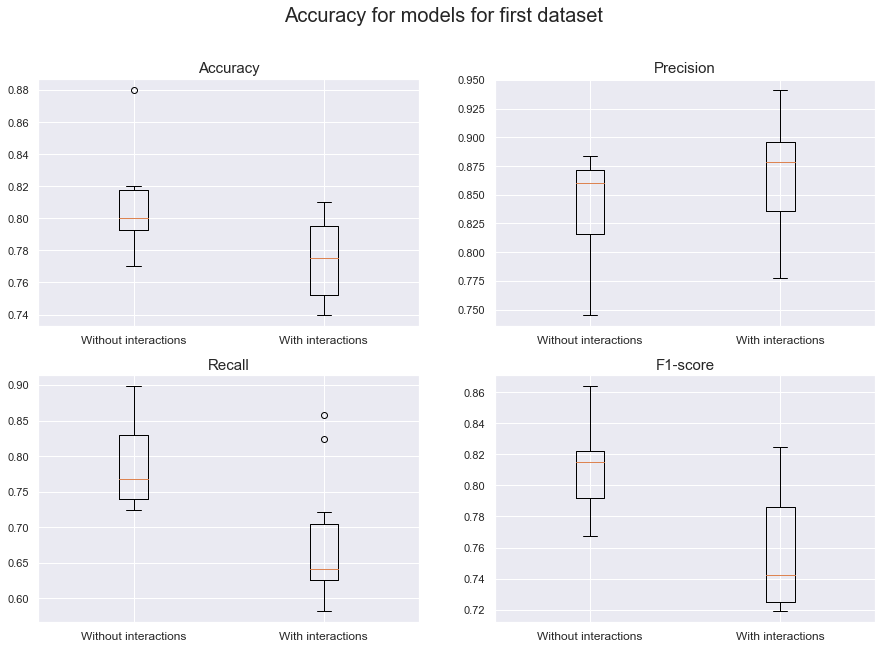

In [11]:
first_acc_all, first_prec_all, first_rec_all, first_f1_all = run_experiments(first_dataset_X, first_dataset_y)
make_boxplot(first_acc_all, first_prec_all, first_rec_all, first_f1_all, 'Accuracy', 'first dataset')

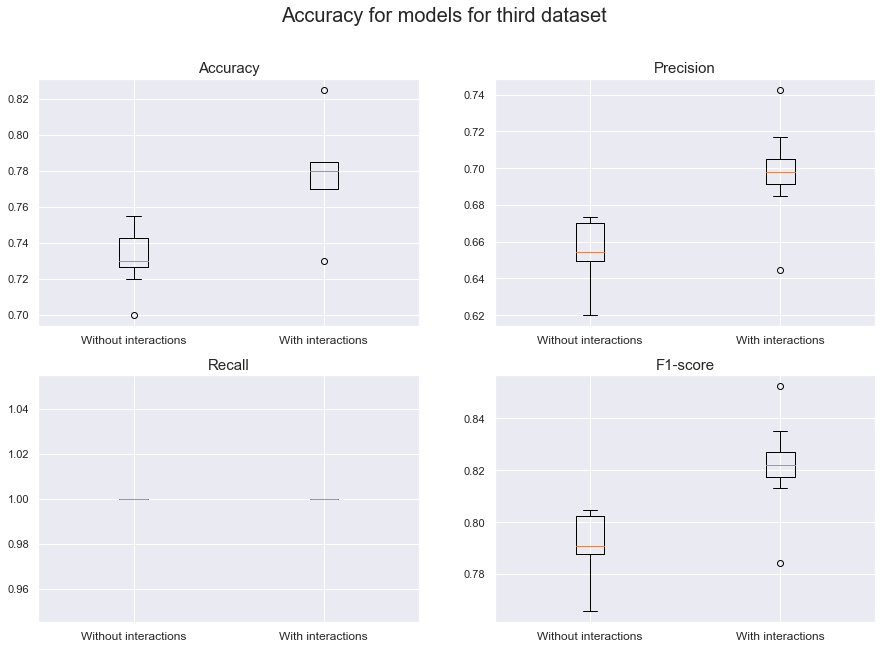

In [12]:
third_acc_all, third_prec_all, third_rec_all, third_f1_all = run_experiments(third_dataset_X, third_dataset_y)
make_boxplot(third_acc_all, third_prec_all, third_rec_all, third_f1_all, 'Accuracy', 'third dataset')

Some differences between datasets are visible, the same with differences between methods with and without interactions.

#### Test 3
Check Accuracy and tolerance behavior during the training.

In [13]:
xor_X_train, xor_X_test, xor_y_train, xor_y_test = train_test_split(xor_X, xor_y, test_size=0.2, random_state=42)

xor_clf_with = LogisticRegression_with_IRLS(test_flag=True, X_test= xor_X_test, y_test=xor_y_test)
xor_clf_with.fit(xor_X_train, xor_y_train, max_iter=100, interaction_ids=[[0, 1]])
test4_acc=xor_clf_with.acc_all
test4_tol = xor_clf_with.tol_all

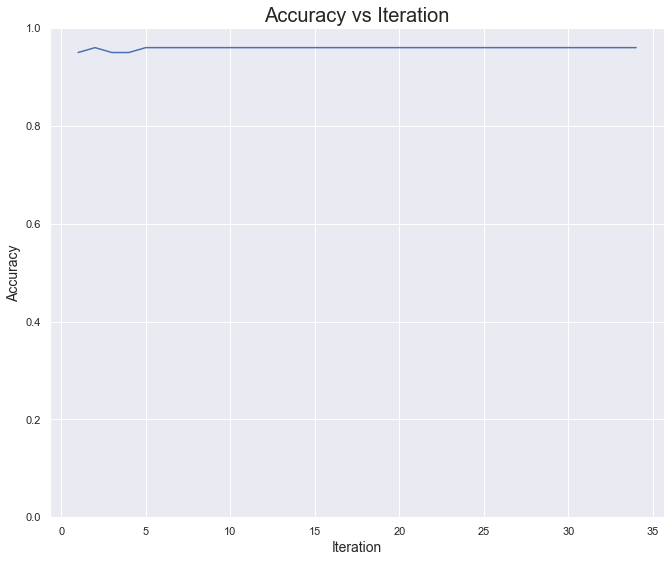

In [14]:
n=range(1, len(test4_acc)+1)
plt.plot(n, test4_acc)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.title('Accuracy vs Iteration', fontsize=20)
plt.ylim(0,1)
plt.show()

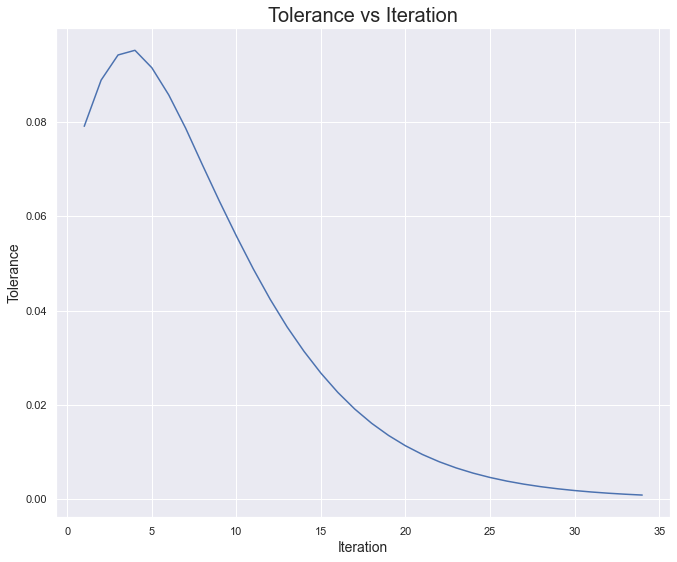

In [15]:
plt.plot(n, test4_tol)
plt.ylabel('Tolerance', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.title('Tolerance vs Iteration', fontsize=20)
plt.show()

#### Test 4

Check the performance on various data:
* Synthetic 1
* Synthetic 2
* Synthetic 3
* Synthetic 4
* XOR

##### Synthetic 1

Accuracy: 0.78


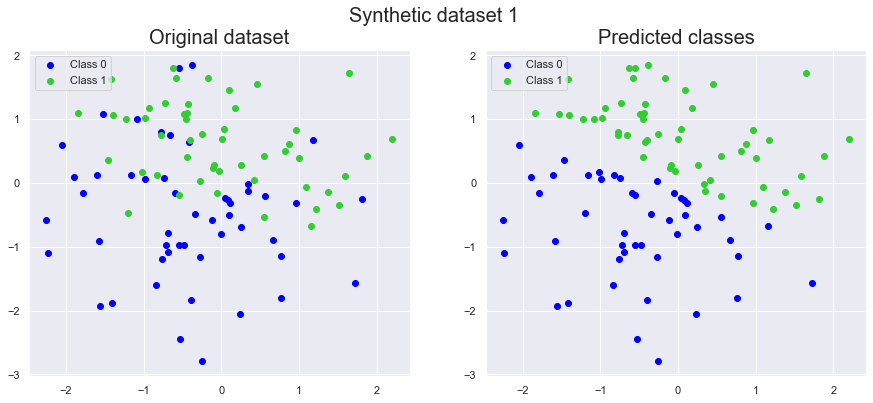

In [16]:
check_performance(first_dataset_X, first_dataset_y, 'Synthetic dataset 1')

Accuracy: 0.75


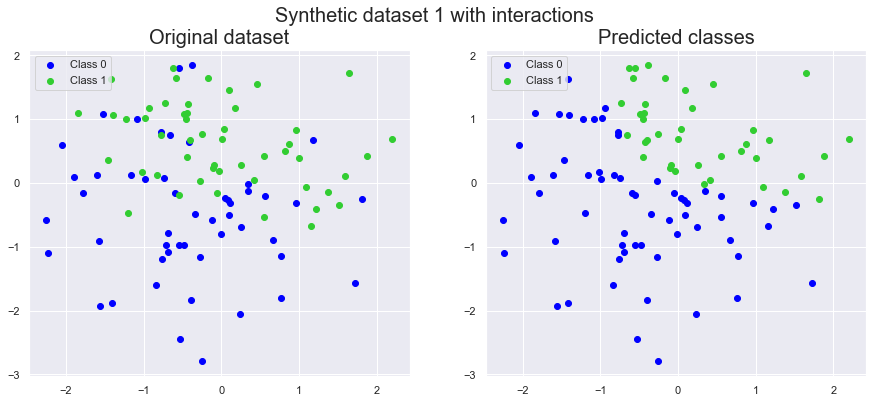

In [17]:
check_performance(first_dataset_X, first_dataset_y, 'Synthetic dataset 1 with interactions', if_interactions=True, interaction_ids=[[0,1]])

##### Synthetic 2

Accuracy: 0.92


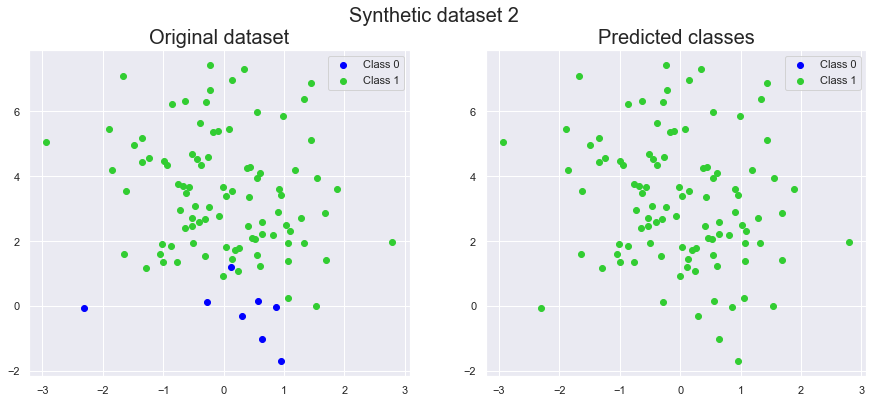

In [18]:
check_performance(second_dataset_X, second_dataset_y, 'Synthetic dataset 2')

Accuracy: 0.92


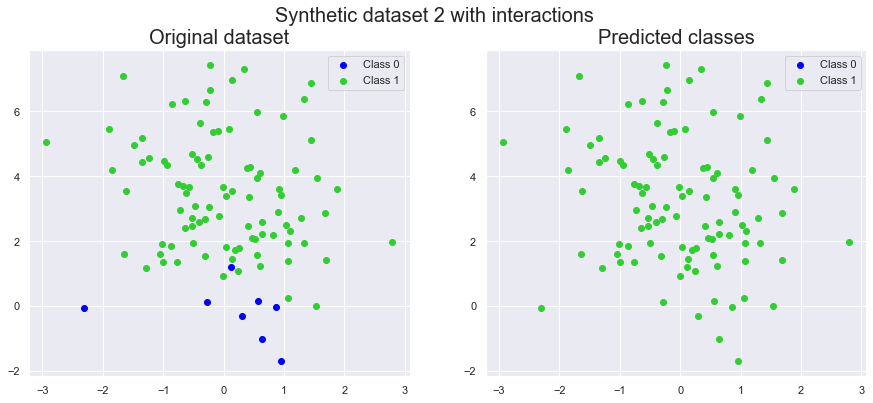

In [19]:
check_performance(second_dataset_X, second_dataset_y, 'Synthetic dataset 2 with interactions', if_interactions=True, interaction_ids=[[0,1],[0,2],[1,2]])

##### Synthetic 3

Accuracy: 0.72


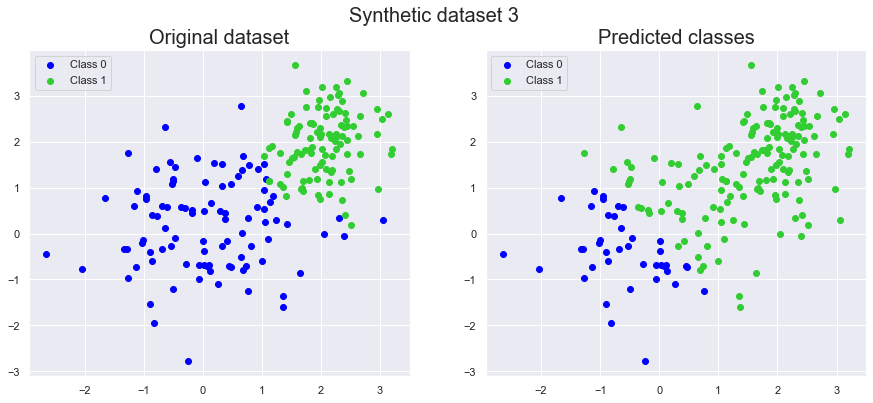

In [20]:
check_performance(third_dataset_X, third_dataset_y, 'Synthetic dataset 3')

Accuracy: 0.785


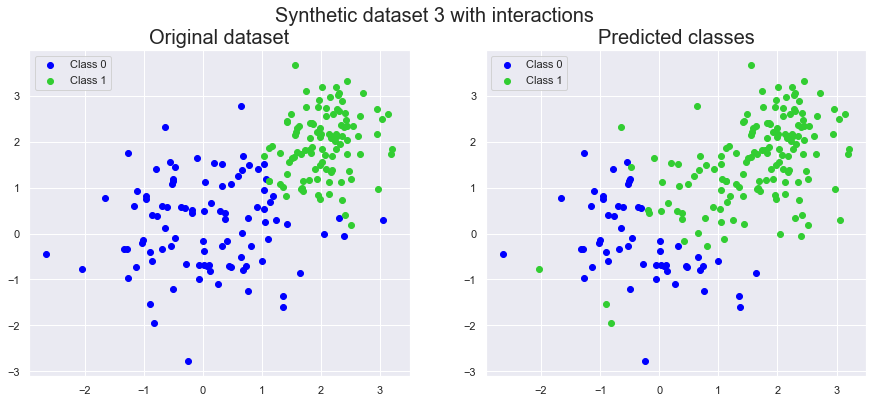

In [21]:
check_performance(third_dataset_X, third_dataset_y, 'Synthetic dataset 3 with interactions', if_interactions=True, interaction_ids=[[0,1],[0,2],[1,2]])

##### Synthetic 4

Accuracy: 0.485


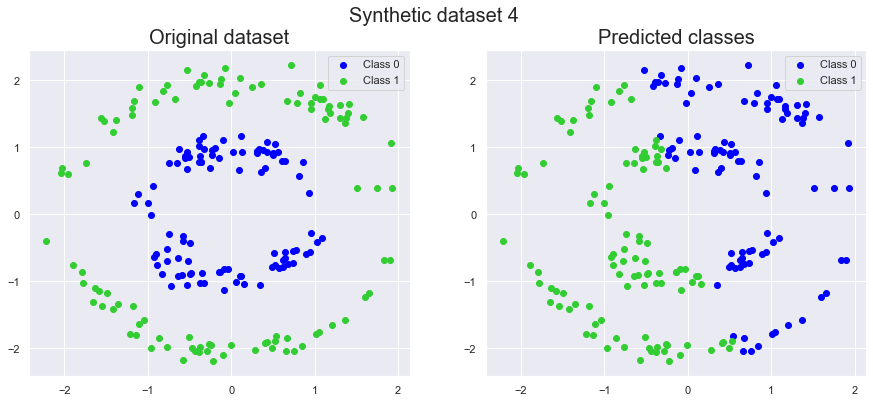

In [22]:
check_performance(fourth_dataset_X, fourth_dataset_y, 'Synthetic dataset 4')

Accuracy: 0.535


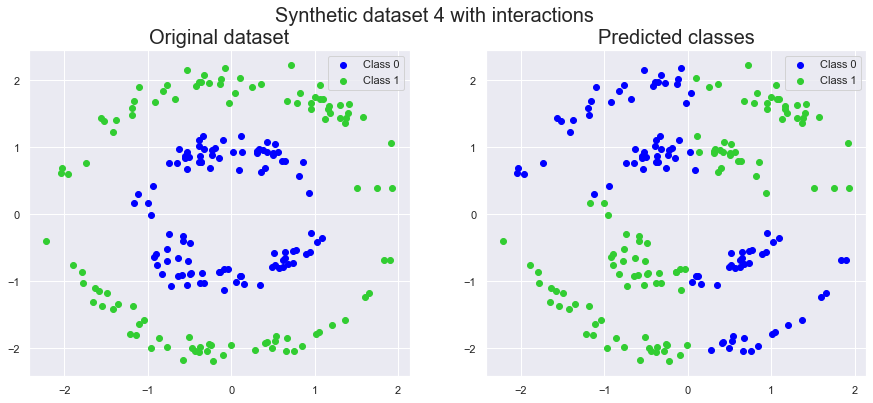

In [23]:
check_performance(fourth_dataset_X, fourth_dataset_y, 'Synthetic dataset 4 with interactions', if_interactions=True, interaction_ids=[[0,1]])

##### XOR

Accuracy: 0.46


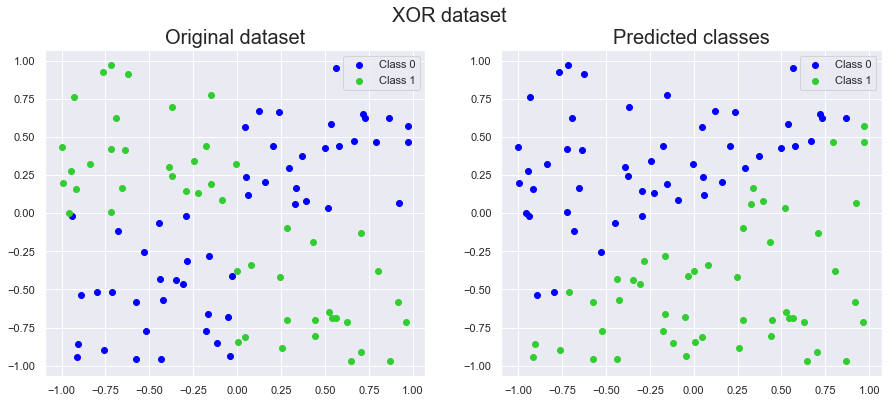

In [24]:
check_performance(xor_X, xor_y, 'XOR dataset')

Accuracy: 0.96


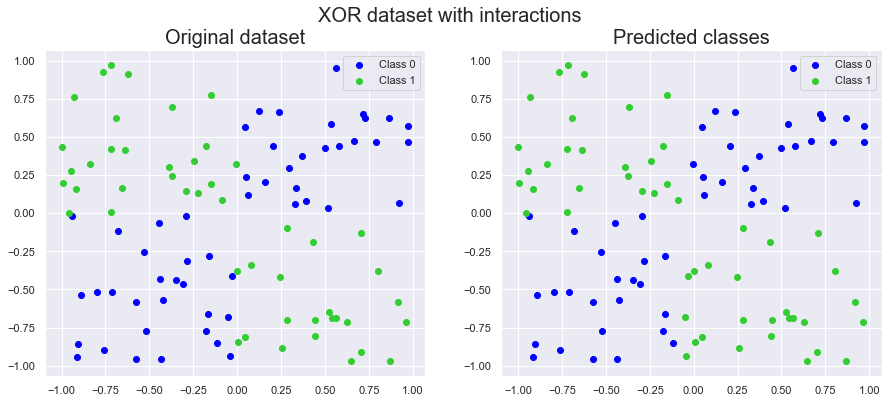

In [25]:
check_performance(xor_X, xor_y, 'XOR dataset with interactions', if_interactions=True, interaction_ids=[[0,1]])